In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

class Perceptron(object):
    """Perceptron classifier."""
    
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        """Fit training data."""
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        """Calculate net input."""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        """Return class label after unit step."""
        return np.where(self.net_input(X) >= 0.0, 1, -1)


In [2]:
# Load the Iris dataset
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
                 header=None, encoding='utf-8')

# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values

# Normalization
X_normalized = (X - X.mean(axis=0)) / X.std(axis=0)

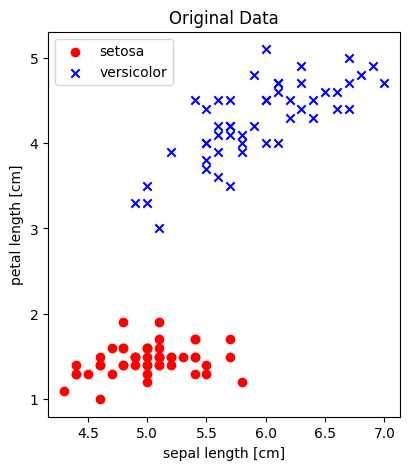

In [3]:
# Plot original data
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('Original Data')
plt.legend()

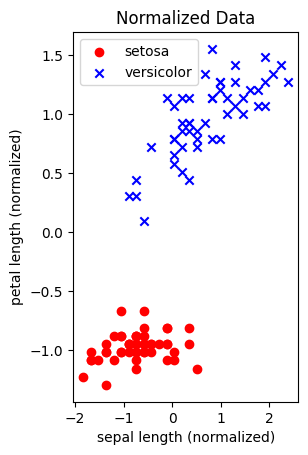

In [4]:
# Plot normalized data
plt.subplot(1, 2, 2)
plt.scatter(X_normalized[:50, 0], X_normalized[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X_normalized[50:100, 0], X_normalized[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length (normalized)')
plt.ylabel('petal length (normalized)')
plt.title('Normalized Data')
plt.legend()

<Figure size 640x480 with 0 Axes>

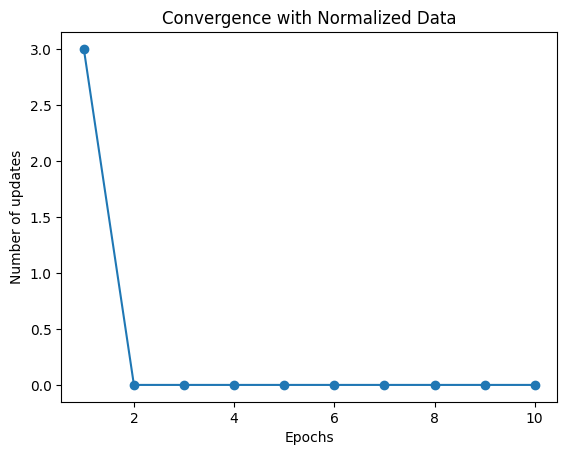

In [5]:
plt.tight_layout()
plt.show()

# Fit perceptron with normalized data
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X_normalized, y)

# Plot convergence
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.title('Convergence with Normalized Data')
plt.show()